Import the modules that will be used.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

#### 1. Dot product between two vectors

Multiplying (dot product) two size $n$ vectors requires $n + 1$ calculations, hence the complexity is $O(n)$

#### 2. Matrix-vector product

Multiplying a $1 \times n$ vector and a $n \times n$ matrix require $n + 1$ calculations for each value in the resulting $1 \times n$ matrix. Thus the complexity is $O(n^2)$

#### 3. Matrix-matrix product

Multiplying two $n \times n$ matrices require $n + 1$ calculations for each value in the ending $n \times n$ matrix, thus complexity is $O(n^3)$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def matrix_product (a, b):
    n = len(a)
    c = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                c[i][j] += a[i][k] * b[k][j]
    return c            

times1 = []
times2 = []

for i in range(9):
    x = np.random.rand(2**i, 2**i)
    y = np.random.rand(2**i, 2**i)
    t1 = %timeit -q -n2 -r2 -o matrix_product(x, y)
    times1.append(t1.best)
    t2 = %timeit -q -n2 -r2 -o np.matmul(x, y)
    times2.append(t2.best)

plt.loglog([2**i for i in range(9)], times1, marker='o', label='My time')
plt.loglog([2**i for i in range(9)], times2, marker='o', label='Numpy time')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.show()

KeyboardInterrupt: 

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

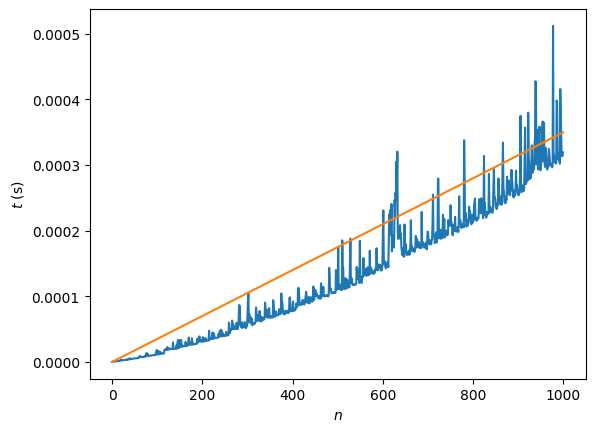

In [5]:
import matplotlib.pyplot as plt

def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n
times = []
for i in range(1000):
    t = %timeit -q -n2 -r2 -o factorial(i)
    times.append(t.best)

plt.plot([i for i in range(1000)], times)
plt.plot([i for i in range(1000)], [0.00035/1000 * i for i in range(1000)])
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [ ]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [ ]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

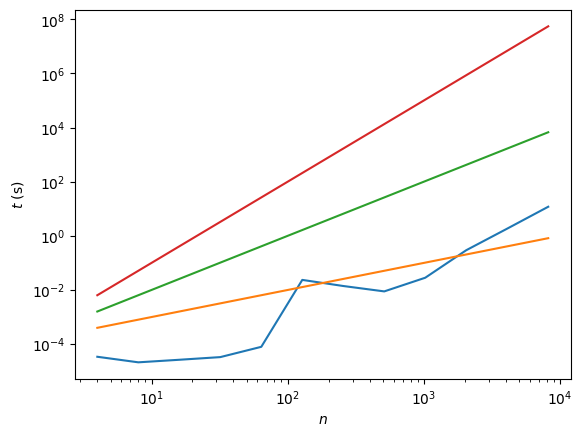

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)

times = []

for item in N:
    A = np.random.rand(item, item)
    t = %timeit -q -n4 -r1 -o np.linalg.slogdet(A)
    times.append(t.best)

plt.loglog(N, times)
plt.loglog(N, 1e-4*N)
plt.loglog(N, 1e-4*N**2)
plt.loglog(N, 1e-4*N**3)

plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.show()

Plot result:

In [ ]:
...